✅ Loaded dataset: (10852, 3)
✅ TF-IDF complete. Shape: (8675, 10000)

📈 MultinomialNB Accuracy: 0.9678
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1769
           1       0.99      0.83      0.91       402

    accuracy                           0.97      2171
   macro avg       0.98      0.92      0.94      2171
weighted avg       0.97      0.97      0.97      2171


📈 LogisticRegression Accuracy: 0.9664
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1769
           1       0.98      0.84      0.90       402

    accuracy                           0.97      2171
   macro avg       0.97      0.92      0.94      2171
weighted avg       0.97      0.97      0.97      2171


📈 LinearSVC Accuracy: 0.9784
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1769
           1       0.98      0.91      0.94       402

    accura

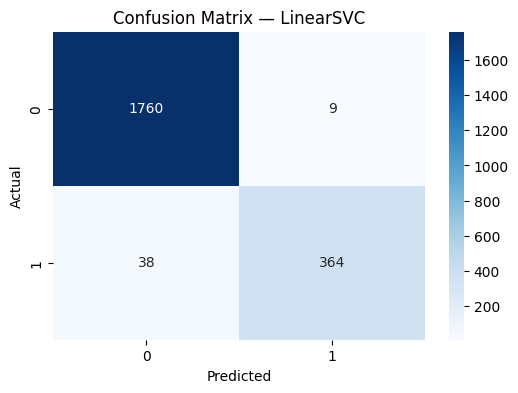

In [2]:
# ===============================
# 🤖 SPAM DETECTION — MODELING
# ===============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 📂 1. Load Cleaned Data
# ===============================
df = pd.read_csv("cleaned_spam_dataset.csv")
print("✅ Loaded dataset:", df.shape)

X = df["clean_text"]
y = df["spam"]

# ===============================
# ✂️ 2. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🔧 Drop or fix any NaN/empty texts (important!)
X_train = X_train.fillna("").replace(r'^\s*$', '', regex=True)
X_test = X_test.fillna("").replace(r'^\s*$', '', regex=True)

# Remove completely empty rows if any
train_mask = X_train != ""
test_mask = X_test != ""
X_train, y_train = X_train[train_mask], y_train[train_mask]
X_test, y_test = X_test[test_mask], y_test[test_mask]

# ===============================
# 🔠 3. TF-IDF Vectorization
# ===============================
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print("✅ TF-IDF complete. Shape:", X_train_vec.shape)

# ===============================
# 🧠 4. Train Models
# ===============================
models = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "LinearSVC": LinearSVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n📈 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

# ===============================
# 🥇 5. Best Model Selection
# ===============================
best_model_name = max(results, key=results.get)
print("\n🏆 Best Model:", best_model_name, "→", results[best_model_name])

# ===============================
# 📊 6. Confusion Matrix
# ===============================
best_model = models[best_model_name]
preds = best_model.predict(X_test_vec)

cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix — {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
